# Apprentissage __supervisé__ : __régression__ linéaire simple

<img src="Figures/rappels.png">

# Boston Housing Dataset

<img src="Images/osman-rana-xhpMNieqBwA-unsplash.jpg"  width="1080">

<span>Photo by <a href="https://unsplash.com/@osmanrana?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Osman Rana</a> on <a href="https://unsplash.com/s/photos/boston?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données

In [2]:
dataset = load_boston(return_X_y=False)

# Description des données

In [3]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe['MEDV'] = dataset.target

dataframe.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# Prédiction de la valeur de biens immobiliers

<img src="Figures/boston_housing_dataset.png">

## Matrice de corrélation

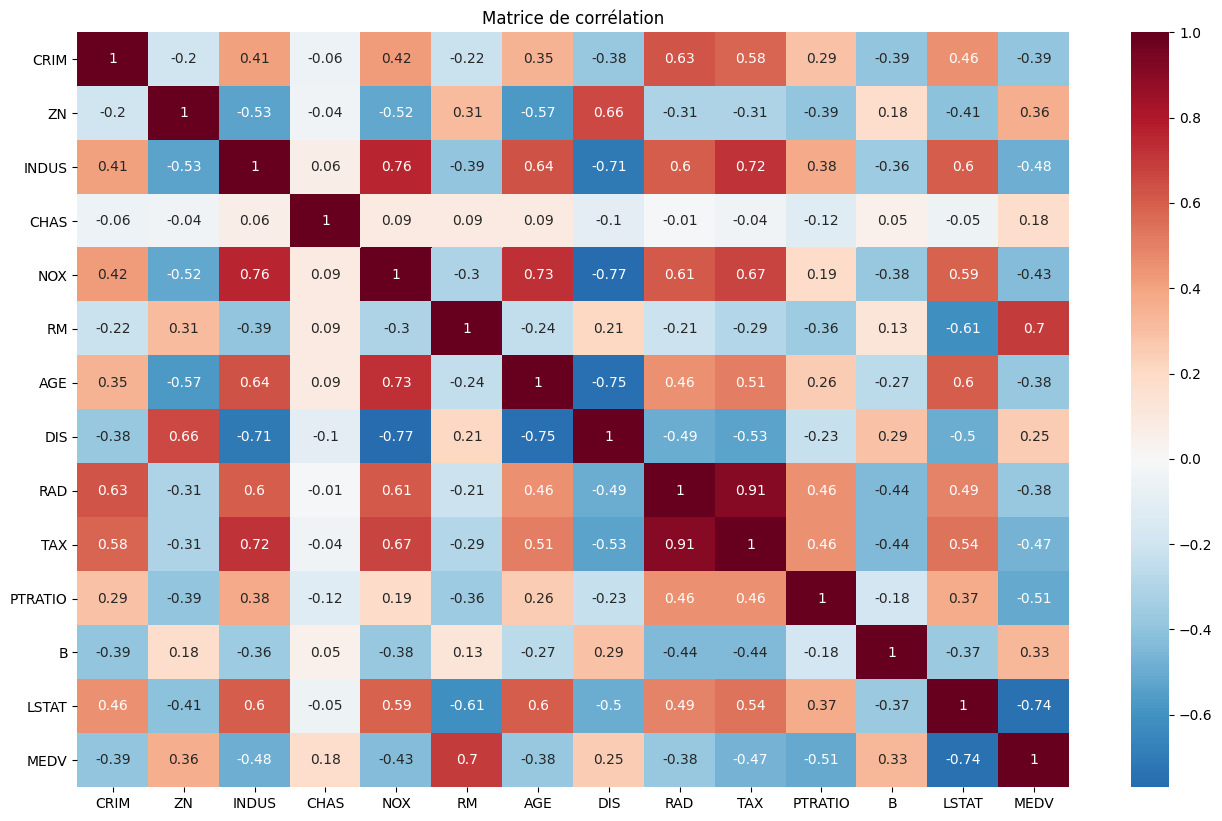

In [5]:
correlation_matrix = dataframe.corr().round(2)

plt.figure(figsize=(16, 10), dpi=100)
plt.title("Matrice de corrélation")
sns.heatmap(correlation_matrix, cmap="RdBu_r", center=0.0, annot=True)
plt.show()

## Coefficient de corrélation

$ \displaystyle\rho = \frac{Cov(X, Y)}{\sigma_{X} \sigma_{Y}} $

Rappel :
* RM : nombre moyen de pièces par logement
* MDEV : valeur du logement

In [6]:
rho = np.corrcoef(dataframe['RM'], dataframe['MEDV'])[0][1]

In [7]:
print("Le coefficient de corrélation entre RM et MDEV vaut :", rho.round(2))

Le coefficient de corrélation entre RM et MDEV vaut : 0.7


# Régression linéaire simple

<img src="Figures/regression_lineaire_simple.png" width="720">

# Méthodes des moindes carrées

## Fonction erreur à minimiser

### Erreur quadratique moyenne ("*Mean Squared Error, MSE*")

<img src="Figures/mse.png" >

$ MSE = \displaystyle\frac{1}{n} \sum_{i=1}^{n} (y_{i} - (\theta_{0} + \theta_{1} x_{i}))^{2} $

* $ \theta_{1} = \displaystyle\frac{\sum_{i=1}^{n} (x_{i} - \bar{x}) (y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}} = \frac{Cov(X,Y)}{Var(X)} $

* $ \theta_{0} = \bar{y} - \theta_{1} \bar{x} $

# Préparation des données

In [8]:
x = dataframe['RM'].to_numpy()
x.shape

(506,)

In [9]:
y = dataframe['MEDV'].to_numpy()
y.shape

(506,)

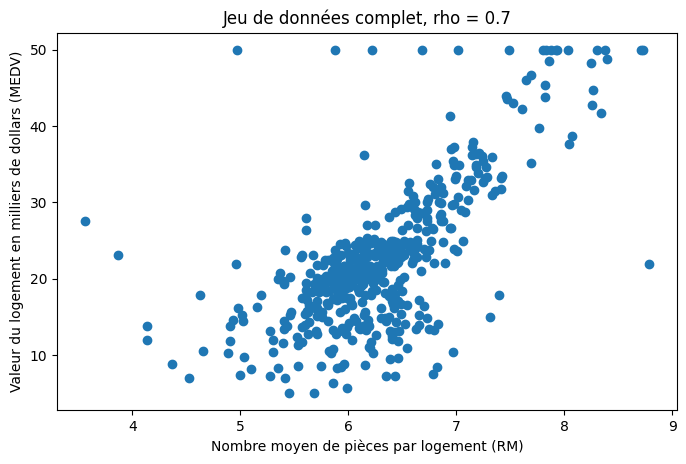

In [10]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Jeu de données complet, rho = " + str(rho.round(2)))
plt.plot(x, y, 'o')
plt.xlabel("Nombre moyen de pièces par logement (RM)")
plt.ylabel("Valeur du logement en milliers de dollars (MEDV)")
plt.show()

# Echantillonnage des données

<img src="Figures/split.png"/>

* "*Training Dataset*" ou jeu d'apprentissage : va servir à entrainer le modèle. Dans notre exemple, il va nous permettre de calculer $ \theta_{0} $ et $ \theta_{1} $.
* "*Test Dataset*" ou jeu de test : va servir à évaluer les performances du modèle, sa capacité à généraliser. Il va permettre de tester si le modèle a bien appris.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [12]:
print(x_train.shape)

(404,)


In [13]:
print(y_train.shape)

(404,)


In [14]:
print(x_test.shape)

(102,)


In [15]:
print(y_test.shape)

(102,)


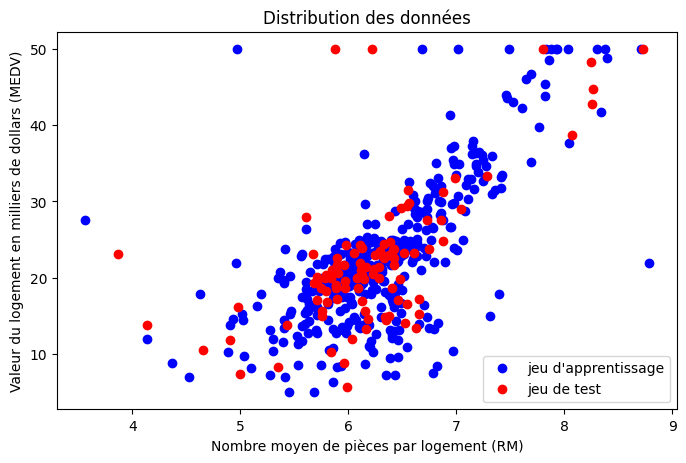

In [16]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Distribution des données")
plt.plot(x_train, y_train, 'bo', label="jeu d'apprentissage")
plt.plot(x_test, y_test, 'ro', label="jeu de test")
plt.xlabel("Nombre moyen de pièces par logement (RM)")
plt.ylabel("Valeur du logement en milliers de dollars (MEDV)")
plt.legend()
plt.show()

# Entrainement du modèle

In [17]:
x_train.shape

(404,)

In [18]:
x_train = x_train.reshape(-1, 1)
x_train.shape

(404, 1)

In [19]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression()

## Coefficient directeur de la droite

$ \theta_{1} = \displaystyle\frac{\sum_{i=1}^{n} (x_{i} - \bar{x}) (y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}} $

In [20]:
theta_1 = model.coef_[0]

In [21]:
print("Le coefficient directeur de la droite vaut :", theta_1.round(2))

Le coefficient directeur de la droite vaut : 9.38


In [22]:
print((np.sum((y_train - np.mean(y_train))*(x_train[:,0] - np.mean(x_train[:,0]))) / np.sum((x_train[:,0] - np.mean(x_train[:,0]))**2)).round(2))

9.38


## Ordonnée à l'origine de la droite

$ \theta_{0} = \bar{y} - \theta_{1} \bar{x} $

In [23]:
theta_0 = model.intercept_

In [24]:
print("L'ordonnée à l'origine de la droite vaut :", theta_0.round(2))

L'ordonnée à l'origine de la droite vaut : -36.48


In [25]:
print((np.mean(y_train) - theta_1*np.mean(x_train[:,0])).round(2))

-36.48


## Affichage du modèle de régression linéaire simple sur le jeu d'apprentissage

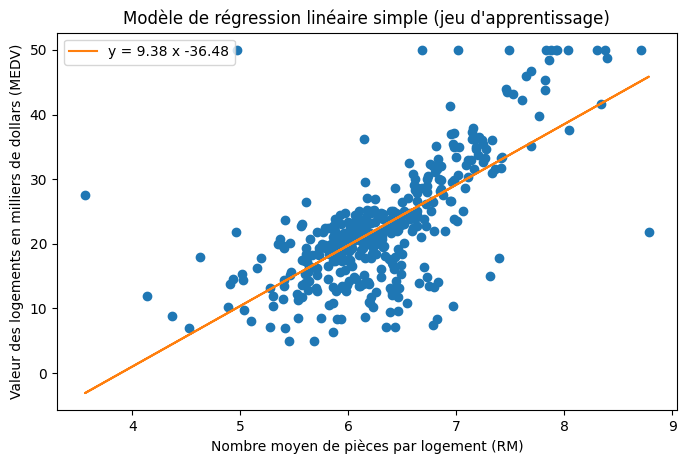

In [26]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Modèle de régression linéaire simple (jeu d'apprentissage)")
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, theta_1*x_train+theta_0, label="y = " + str(theta_1.round(2)) + " x " + str(theta_0.round(2)))
plt.xlabel("Nombre moyen de pièces par logement (RM)")
plt.ylabel("Valeur des logements en milliers de dollars (MEDV)")
plt.legend()
plt.show()

# Performances du modèle sur le jeu d'apprentissage

In [27]:
y_predict_train = model.predict(x_train)

## Erreur quadratique moyenne

$ MSE = \displaystyle\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} $

In [28]:
MSE_train = mean_squared_error(y_train, y_predict_train)

In [29]:
print("L'erreur quadratique moyenne vaut :", MSE_train.round(2))

L'erreur quadratique moyenne vaut : 42.82


## Racine carrée de l'erreur quadratique moyenne

$ RMSE = \displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}} $

In [30]:
RMSE_train = mean_squared_error(y_train, y_predict_train, squared=False)

In [31]:
print("La racine carrée de l'erreur quadratique moyenne vaut :", RMSE_train.round(2))

La racine carrée de l'erreur quadratique moyenne vaut : 6.54


## Coefficient de détermination

$ R^{2} = 1 - \displaystyle\frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}} $

In [32]:
R_squared_train = 1.0 - (np.sum((y_train - y_predict_train)**2) / np.sum((y_train - np.mean(y_train))**2))

In [33]:
print("Le coefficient de détermination vaut :", R_squared_train.round(4))

Le coefficient de détermination vaut : 0.4971


### Autre méthode pour calculer le coefficient de détermination (non recommandée)

In [34]:
R_squared_train_bis = r2_score(y_train, y_predict_train)

In [35]:
print("Le coefficient de détermination vaut :", R_squared_train_bis.round(4))

Le coefficient de détermination vaut : 0.4971


# Performances du modèle sur le jeu de test

In [36]:
x_test.shape

(102,)

In [37]:
x_test = x_test.reshape(-1, 1)
x_test.shape

(102, 1)

In [38]:
y_predict_test = model.predict(x_test)

## Affichage du modèle de régression linéaire simple sur le jeu de test

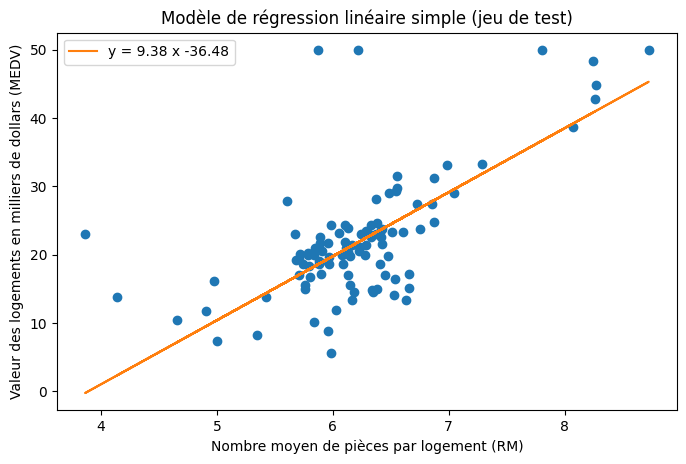

In [39]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Modèle de régression linéaire simple (jeu de test)")
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, theta_1*x_test+theta_0, label="y = " + str(theta_1.round(2)) + " x " + str(theta_0.round(2)))
plt.xlabel("Nombre moyen de pièces par logement (RM)")
plt.ylabel("Valeur des logements en milliers de dollars (MEDV)")
plt.legend()
plt.show()

## Erreur quadratique moyenne

$ MSE = \displaystyle\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} $

In [40]:
MSE_test = mean_squared_error(y_test, y_predict_test)

In [41]:
print("L'erreur quadratique moyenne vaut :", MSE_test.round(2))

L'erreur quadratique moyenne vaut : 46.91


## Racine carrée de l'erreur quadratique moyenne

$ RMSE = \displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}} $

In [42]:
RMSE_test = mean_squared_error(y_test, y_predict_test, squared=False)

In [43]:
print("La racine carrée de l'erreur quadratique moyenne vaut :", RMSE_test.round(2))

La racine carrée de l'erreur quadratique moyenne vaut : 6.85


## Coefficient de détermination

$ R^{2} = 1 - \displaystyle\frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}} $

In [44]:
R_squared_test = 1.0 - (np.sum((y_test - y_predict_test)**2) / np.sum((y_test - np.mean(y_test))**2))

In [45]:
print("Le coefficient de détermination vaut :", R_squared_test.round(4))

Le coefficient de détermination vaut : 0.4239


### Autre méthode pour calculer le coefficient de détermination (non recommandée)

In [46]:
R_squared_test_bis = r2_score(y_test, y_predict_test)

In [47]:
print("Le coefficient de détermination vaut :", R_squared_test_bis.round(4))

Le coefficient de détermination vaut : 0.4239
